In [2]:
# imports
from datasets import load_dataset
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

Load Data

In [ ]:
# load train dataset, print number of samples and features
# load from hugging face
dataset_train = load_dataset('Falah/Alzheimer_MRI', split='train')
dataset_train = dataset_train.to_pandas()
# print descriptive stats
print("Number of examples:", len(dataset_train))
print("Sample data:")
for example in dataset_train[:5]:
    print(example)

README.md:   0%|          | 0.00/2.13k [00:00<?, ?B/s]

C:\Users\Jayesh\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Jayesh\.cache\huggingface\hub\datasets--Falah--Alzheimer_MRI. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


(…)-00000-of-00001-c08a401c53fe5312.parquet:   0%|          | 0.00/22.6M [00:00<?, ?B/s]

(…)-00000-of-00001-44110b9df98c5585.parquet:   0%|          | 0.00/5.65M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5120 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1280 [00:00<?, ? examples/s]

Number of examples: 5120
Sample data:
image
label


In [8]:
# load test dataset, print number of samples and features
dataset_test = load_dataset('Falah/Alzheimer_MRI', split='test')
dataset_test = dataset_test.to_pandas()
print("Number of examples:", len(dataset_test))
print("Sample data:")
for example in dataset_test[:5]:
    print(example)

Number of examples: 1280
Sample data:
image
label


In [10]:
# categories
disease_label_from_category = {
    0: "Mild Demented",
    1: "Moderate Demented",
    2: "Non Demented",
    3: "Very Mild Demented",
}

In [12]:
# show train dataset
dataset_train.head()

,image,label
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2


In [14]:
# show test dataset
dataset_test.head()

,image,label
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0


In [16]:
# convert bytes to image values representing intensity of pixels
def dict_to_image(image_dict):
    if isinstance(image_dict, dict) and 'bytes' in image_dict:
        byte_string = image_dict['bytes']
        nparr = np.frombuffer(byte_string, np.uint8)
        img = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)
        return img
    else:
        raise TypeError(f"Expected dictionary with 'bytes' key, got {type(image_dict)}")

In [18]:
# convert train
dataset_train['img_arr'] = dataset_train['image'].apply(dict_to_image)
dataset_train.drop("image", axis=1, inplace=True)
dataset_train.head()

,label,img_arr
0,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [20]:
# view example array representation of image
example_array = dataset_train['img_arr'][1]
example_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [22]:
# flatten array, view range of array values
flattened_array = [item for sublist in example_array for item in sublist]
print(min(flattened_array))
print(max(flattened_array))

0
255


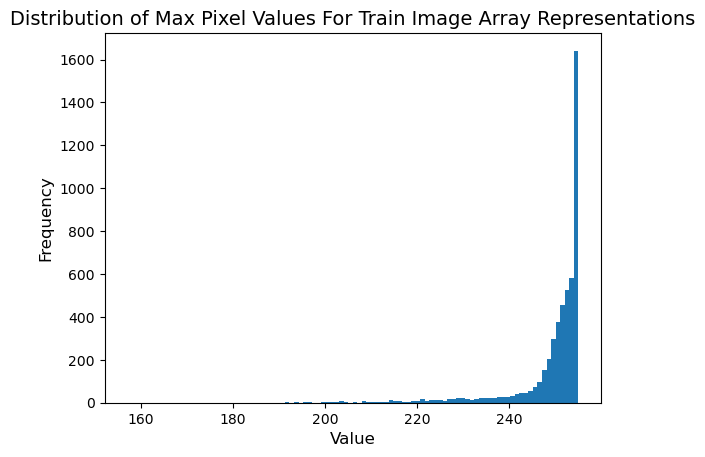

In [24]:
# plot max pixel values across train images, general sense of range
max_values = []
for x in dataset_train['img_arr']:
    working_flattened_array = [item for sublist in x for item in sublist]
    max_values.append(max(working_flattened_array))
    
plt.hist(max_values, bins=100)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Max Pixel Values For Train Image Array Representations', fontsize=14)
plt.show()

In [26]:
# convert test
dataset_test['img_arr'] = dataset_test['image'].apply(dict_to_image)
dataset_test.drop("image", axis=1, inplace=True)
dataset_test.head()

,label,img_arr
0,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


Visualize Data

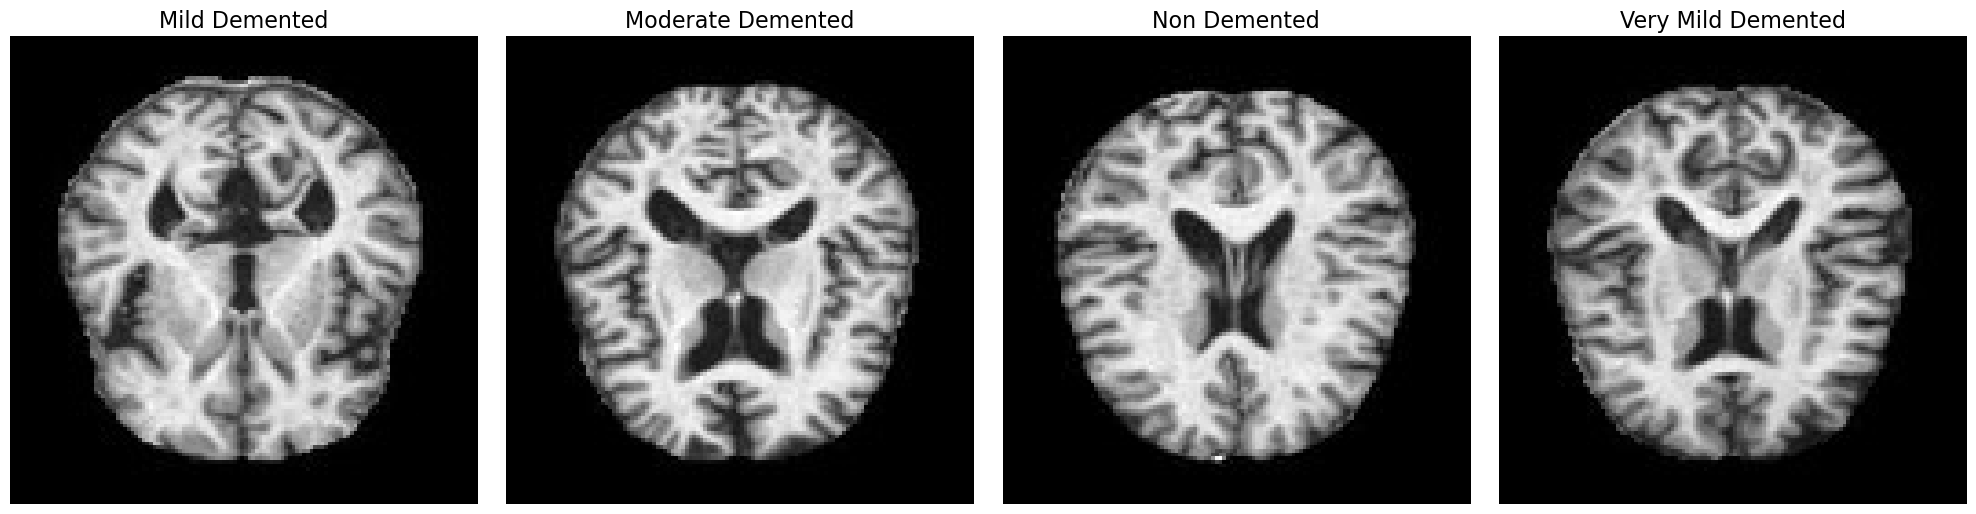

In [ ]:
# visualize one in each category
# create figure
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
axs = ax.flatten()
# iterate once per label
for label in range(4):
    # get the rows for that label
    matching_rows = dataset_train[dataset_train['label'] == label]
    # ensure there are some rows for the label
    if not matching_rows.empty:
        # choose an example
        img_data = matching_rows.iloc[0]['img_arr']
        # plot
        axs[label].imshow(img_data, cmap="gray")
        axs[label].set_title(disease_label_from_category[label], fontsize=16)
        axs[label].axis('off')
    else:
        axs[label].imshow(np.zeros((10, 10)), cmap="gray")
        axs[label].set_title(f"No data for label {label}", fontsize=16)
        axs[label].axis('off')
plt.tight_layout()
plt.show()

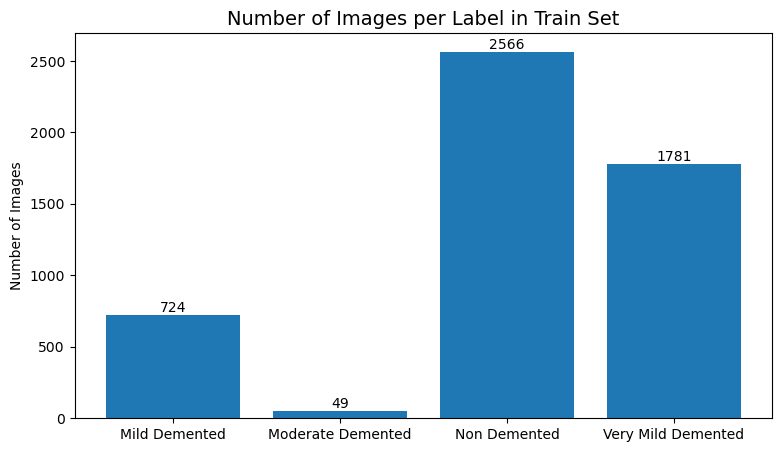

In [ ]:
# plot count of images in each category, train data
# get counts of each label
bar_heights = dataset_train['label'].value_counts().sort_index()
# arrange bar positions
bar_positions = np.arange(0, 4, 1)

# plot
plt.figure(figsize=(9, 5))
plt.bar(bar_positions, bar_heights)

# position text
for position, height in zip(bar_positions, bar_heights):
    plt.text(position, height + 1, str(height), ha='center', va='bottom', fontsize=10)

plt.ylabel("Number of Images")
plt.xticks(bar_positions, labels=[disease_label_from_category[i] for i in range(4)])
plt.title("Number of Images per Label in Train Set", fontsize=14)
plt.show()

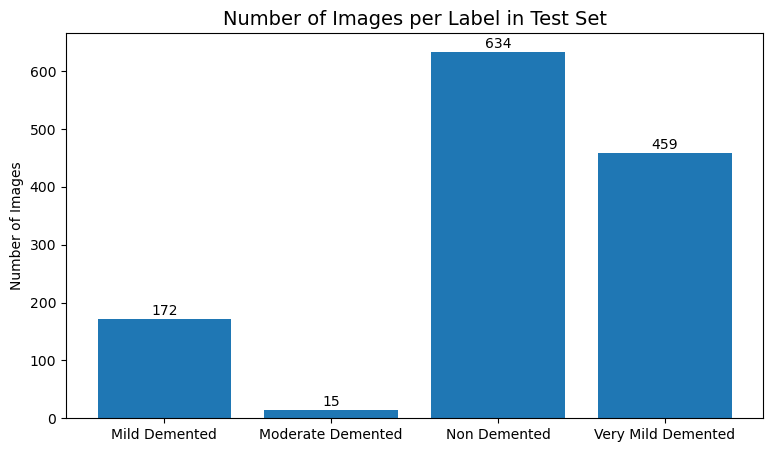

In [32]:
# plot count of images in each category, test data
bar_heights = dataset_test['label'].value_counts().sort_index()
bar_positions = np.arange(0, 4, 1)

plt.figure(figsize=(9, 5))
plt.bar(bar_positions, bar_heights)

for position, height in zip(bar_positions, bar_heights):
    plt.text(position, height + 1, str(height), ha='center', va='bottom', fontsize=10)

plt.ylabel("Number of Images")
plt.xticks(bar_positions, labels=[disease_label_from_category[i] for i in range(4)])
plt.title("Number of Images per Label in Test Set", fontsize=14)
plt.show()